<a href="https://colab.research.google.com/github/gilbert-umuzi/Google-Advanced-Data-Analytics-Professional-Certificate/blob/main/ACN_SAP_E2E_applicant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction
##Overview and Objective
This Jupyter Notebook aims to analyze the applicant data for the SAP Educate to Employ (E2E) programme, facilitated by the African Coding Network (ACN). The primary focus countries for this analysis are Nigeria, Kenya, and South Africa. The data has been gathered through recruitment campaigns conducted by Yoma in partnership with UNICEF country offices, leveraging platforms like uReport and existing local partnerships.

##Target Audience
The intended audience for this notebook includes stakeholders from ACN, SAP, Yoma, and UNICEF, as well as any other parties interested in understanding the demographics and characteristics of the applicants.

##Key Questions
* What is the gender distribution among the applicants?
* What is the age range of the applicants?
* What are the nationalities of the applicants?
* How are applicants distributed across focus countries?

##Data Preparation
**Data Import:** Utilizes pandas for data manipulation and google.colab for file I/O.
**Data Cleaning:** Employs Python's standard libraries along with pandas to clean and prepare the data. Special attention is paid to standardizing unique entries, especially in geographical information.

##Data Analysis
**Demographic Analysis:** Explores key demographic features like gender, age, and nationality using pandas' aggregation methods.
**Geographical Analysis:** Utilizes fuzzywuzzy for string matching to standardize metropolitan area names. The geographical data is then further refined using geopy for geocoding.

##Visualization
**Matplotlib:** Used extensively for generating bar and pie charts for a detailed breakdown of demographic and geographical attributes.
**Folium:** Employed to create heat maps for geographical distribution visualization.

##Optimization & Efficiency
**Python-Levenshtein:** Installed to speed up the fuzzy string matching computations.
**Caching:** Implemented for geocoding operations to minimize API calls and enhance efficiency.

# 2. Data Import and Initial Exploration
##Summary
In this section, we import the necessary Python libraries and load the dataset for analysis. A brief overview of the dataset's structure, columns, and initial statistics will be provided.

In [1]:
# Import essential libraries—google.colab for file I/O and pandas for data manipulation.
from google.colab import files
import pandas as pd

In [2]:
# Invoke file upload interface for dataset ingestion into Colab workspace.
uploaded = files.upload()

Saving ACN_Applicants_clean.csv to ACN_Applicants_clean (2).csv


In [3]:
# Load dataset into DataFrame and display first five rows for initial inspection.
df = pd.read_csv("ACN_Applicants_clean.csv")
df.head()


,Gender,Do you have a computer to do this course?,How do you connect to the internet?,Nationality,Current career role,Highest Education ACN,Which country do you currently live in?,Aptitude test performance,Disability,Nearest Metropolitan area,How close do you live to this city/town?,Age,Have you created a profile on the Yoma platform?,Nearest Metro Standard,Latitude,Longitude
0,Female,"I don't have a computer, but can arrange to us...","I have reliable internet (data/wifi), around 5...",Angolan,NaN,High School,Nigeria,Below standard,No,Lekki,I live in this town/city,42,Yes,NaN,NaN,NaN
1,Female,I have my own computer,"I use mobile data, and can afford 2-4GB per mo...",Benin,NaN,Bachelor's Degree,Benin,NaN,I prefer not to say,"Godomey, Womey Sodo",I live 5-10km away from this town/city,22,Yes,NaN,NaN,NaN
2,Female,I have my own computer,"I use mobile data, and can afford 2GB or less ...",Burundian,NaN,Not Completed High School,Burkina Faso,NaN,No,Cape Town,I live within 5km of this town/city,20,No,Ebonyi StateCape Town,NaN,NaN
3,Female,I have my own computer,I have very limited mobile data.,Central African Republic,NaN,Tertiary Diploma,Nigeria,NaN,No,Onitsha,I live in this town/city,41,No,Onitsha,6.146162,6.801909
4,Female,I only have a smart phone,"I use mobile data, and can afford 2-4GB per mo...",Central African Republic,NaN,Not Completed High School,South Africa,NaN,No,Grahamstown,I live 5-10km away from this town/city,23,No,NaN,NaN,NaN


In [4]:
# Retrieve DataFrame dimensions to assess dataset scale.
df.shape

(17612, 16)

In [5]:
# Enumerate missing values across columns for data quality assessment.
df.isna().sum()

Gender                                                  0
Do you have a computer to do this course?               0
How do you connect to the internet?                     0
Nationality                                             0
Current career role                                 13358
Highest Education ACN                                   0
Which country do you currently live in?                 0
Aptitude test performance                            7131
Disability                                              0
Nearest Metropolitan area                               0
How close do you live to this city/town?                0
Age                                                     0
Have you created a profile on the Yoma platform?        0
Nearest Metro Standard                               3872
Latitude                                             4008
Longitude                                            4008
dtype: int64

#3. Gender Distribution Analysis
##Summary
This section delves into the gender distribution among the applicants for the SAP E2E programme. We will employ various metrics and visualizations to better understand the gender balance and its implications for the programme.



In [6]:
# Calculate the frequency distribution of gender categories within the dataset.
df['Gender'].value_counts()

Male                   12953
Female                  4625
I prefer not to say       20
Other / non-binary        14
Name: Gender, dtype: int64

In [7]:
# Compute the percentage distribution of gender within each focus country (Nigeria, Kenya, South Africa).
 (df[df['Nationality'].isin(['Nigerian', 'Kenyan', 'South African'])].groupby('Nationality')['Gender']
 .value_counts(normalize=True)
 .mul(100)
 .round(1)
 .astype(str) + '%')

Nationality    Gender             
Kenyan         Male                   64.1%
               Female                 35.5%
               I prefer not to say     0.2%
               Other / non-binary      0.2%
Nigerian       Male                   77.8%
               Female                 22.1%
               I prefer not to say     0.1%
               Other / non-binary      0.0%
South African  Female                 64.3%
               Male                   35.3%
               I prefer not to say     0.2%
               Other / non-binary      0.2%
Name: Gender, dtype: object

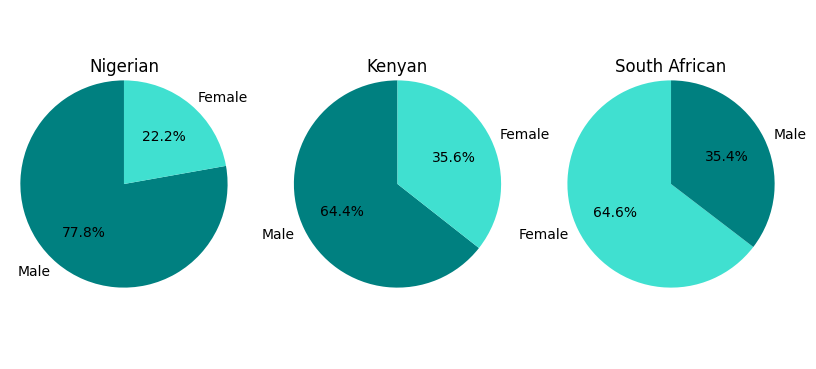

In [8]:
# Generate pie charts to visualize the gender distribution for each of the focus countries.
import matplotlib.pyplot as plt

# Filter DataFrame to only include Male and Female categories
df_filtered = df[df['Gender'].isin(['Male', 'Female'])]

# Generate the data
data = (df_filtered[df_filtered['Nationality'].isin(['Nigerian', 'Kenyan', 'South African'])]
        .groupby('Nationality')['Gender']
        .value_counts(normalize=True)
        .mul(100)
        .round(1))

# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figure size here

# Gender-neutral colors for each gender
colors = {'Male': '#008080', 'Female': '#40E0D0'}

# Loop over each nationality
for i, nationality in enumerate(['Nigerian', 'Kenyan', 'South African']):
    ax = axes[i]

    # Subset data for the nationality
    subset_data = data.loc[nationality]

    # Create pie chart
    ax.pie(subset_data, labels=subset_data.index, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in subset_data.index])

    # Set aspect ratio & title
    ax.axis('equal')
    ax.set_title(nationality, y=0.8)  # Adjust y position here

# Adjust layout
plt.subplots_adjust(top=0.85, bottom=0.15)  # Adjust layout here

# Display pie charts
plt.show()




#4. Age Distribution Analysis
##Summary
Here, we focus on analyzing the age distribution among the applicants. The objective is to identify any notable trends or patterns related to age, which may be valuable for future recruitment strategies.

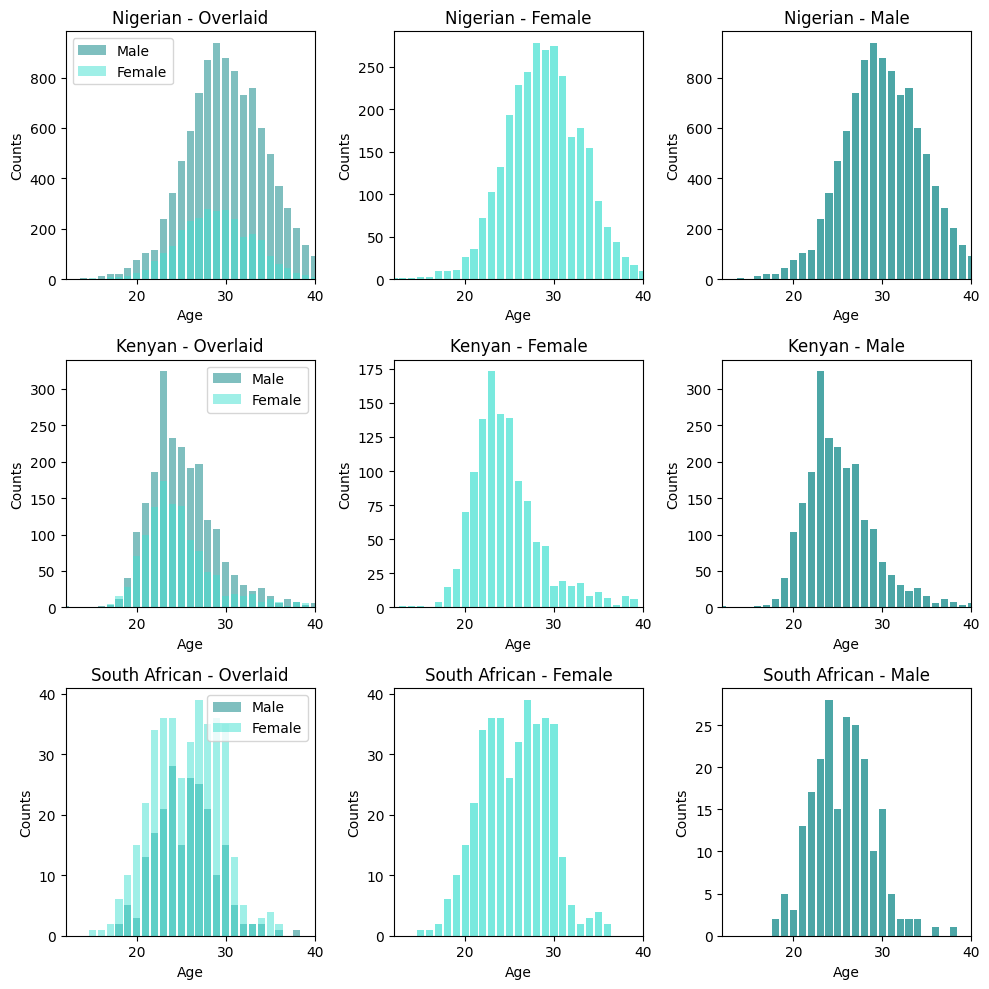

In [9]:
# Create bar charts to visualize age distribution, segregated by gender and nationality.
import matplotlib.pyplot as plt
import pandas as pd

# Generate the data
data = (df[df['Nationality'].isin(['Nigerian', 'Kenyan', 'South African']) & df['Gender'].isin(['Male', 'Female'])]
        .groupby(['Nationality', 'Age', 'Gender'])
        .size()
        .reset_index(name='Counts'))

# Filter age range from 12 to 40
data = data[(data['Age'] >= 12) & (data['Age'] <= 40)]

# Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Define gender colors
colors = {'Male': '#008080', 'Female': '#40E0D0'}

# Loop through each nationality
for i, nationality in enumerate(['Nigerian', 'Kenyan', 'South African']):

    for j, gender in enumerate(['Overlaid', 'Female', 'Male']):
        ax = axes[i, j]

        if gender == 'Overlaid':
            for g in ['Male', 'Female']:
                subset = data[(data['Nationality'] == nationality) & (data['Gender'] == g)]
                ax.bar(subset['Age'], subset['Counts'], alpha=0.5, label=g, color=colors[g])
        else:
            subset = data[(data['Nationality'] == nationality) & (data['Gender'] == gender)]
            ax.bar(subset['Age'], subset['Counts'], alpha=0.7, color=colors[gender])

        ax.set_title(f'{nationality} - {gender}')
        ax.set_xlabel('Age')
        ax.set_ylabel('Counts')
        ax.set_xlim(12, 40)

        if gender == 'Overlaid':
            ax.legend()

plt.tight_layout()
plt.show()


#5. Nationality Distribution Analysis
##Summary
In this part, we examine the nationalities of the applicants. Understanding the geographic origin of applicants not only provides insights into the reach of the recruitment campaigns but also helps in tailoring future initiatives to specific regions or countries.

In [10]:
# Enumerate the frequency of each nationality within the dataset for an overview of geographic reach.
df['Nationality'].value_counts()

Nigerian                        13408
Kenyan                           3442
South African                     617
Other                              27
Ugandan                            15
Central African Republic           15
Zimbabwean                         14
South Sudan                        12
Ethiopian                           9
Somalia                             9
Tanzanian                           6
Democratic Republic of Congo        5
Burundian                           5
Benin                               5
Ghanaian                            4
Cameroonian                         4
Rwandan                             3
Sudan                               2
Zambian                             2
Malawian                            2
Senegalese                          1
Namibian                            1
Angolan                             1
Gabonese                            1
Chad                                1
Sierra Leone                        1
Name: Nation

Where do learners live within Nigeria?

In [11]:
# Count the number of unique metropolitan areas for applicants from Nigeria.
df[df['Nationality'] == 'Nigerian']['Nearest Metropolitan area'].nunique()

3478

In [12]:
# Calculate the frequency of applicants from each metropolitan area in Nigeria to identify dominant regions.
df[df['Nationality'] == 'Nigerian']['Nearest Metropolitan area'].value_counts()

Lagos                               872
Abuja                               625
Kano                                501
Ibadan                              332
Lagos                               292
                                   ... 
Igando/Lagos                          1
Abeokuta.                             1
Makurdi/Benue State                   1
Federal capital territory, Abuja      1
Oshodi-isolo                          1
Name: Nearest Metropolitan area, Length: 3478, dtype: int64

Note Lagos listed twice. There are too many unique entries due to user input. The data needs to be cleaned to standardize place names.

##Fuzzy String Matching
This section describes the use of fuzzy string matching to standardize place names.

In [13]:
# Install the fuzzywuzzy library required for string matching operations.
pip install fuzzywuzzy


In [14]:
# Install the python-Levenshtein library to optimize fuzzy string matching computations.
pip install python-Levenshtein

In [15]:
#  Import fuzzywuzzy library and perform string matching to standardize metro area names. Define a threshold to filter acceptable matches.
from fuzzywuzzy import process

unique_areas = df['Nearest Metropolitan area'].unique()

# The list of standardized place names
choices = [

    # Nigeria
    # Cities and Towns
    "Lagos",
    "Abuja",
    "Kano",
    "Ibadan",
    "Port Harcourt",
    "Benin City",
    "Kaduna",
    "Enugu",
    "Onitsha",
    "Warri",
    "Owerri",
    "Abeokuta",
    "Calabar",
    "Uyo",
    "Ilorin",
    "Jos",
    "Maiduguri",
    "Zaria",
    "Sokoto",
    "Katsina",
    "Bauchi",
    "Makurdi",
    "Minna",
    "Gombe",
    "Yenagoa",
    "Osogbo",
    "Jalingo",
    "Damaturu",
    "Awka",
    "Lokoja",
    "Asaba",
    "Ado-Ekiti",
    "Akure",
    "Dutse",
    "Lafia",
    "Birnin Kebbi",

    # States
    "Lagos State",
    "Federal Capital Territory",  # For Abuja
    "Kano State",
    "Oyo State",
    "Rivers State",
    "Edo State",
    "Kaduna State",
    "Enugu State",
    "Anambra State",
    "Delta State",
    "Imo State",
    "Ogun State",
    "Cross River State",
    "Akwa Ibom State",
    "Kwara State",
    "Plateau State",
    "Borno State",
    "Sokoto State",
    "Katsina State",
    "Bauchi State",
    "Benue State",
    "Niger State",
    "Gombe State",
    "Bayelsa State",
    "Osun State",
    "Taraba State",
    "Yobe State",
    "Abia State",
    "Kogi State",
    "Ekiti State",
    "Ondo State",
    "Jigawa State",
    "Nasarawa State",
    "Kebbi State",
    "Zamfara State",
    "Adamawa State",
    "Ebonyi State"

    # South Africa
    # Cities and Towns
    "Cape Town",
    "Johannesburg",
    "Pretoria",
    "Durban",
    "Port Elizabeth",
    "Bloemfontein",
    "Polokwane",
    "Nelspruit",
    "Kimberley",
    "East London",
    "Soweto",
    "Stellenbosch",
    "Paarl",
    "George",
    "Pietermaritzburg",
    "Rustenburg",
    "Germiston",
    "Benoni",
    # Provinces
    "Western Cape",
    "Gauteng",
    "KwaZulu-Natal",
    "Eastern Cape",
    "Free State",
    "Limpopo",
    "Mpumalanga",
    "North West",
    "Northern Cape",

    # Kenya
    # Cities and Towns
    "Nairobi",
    "Mombasa",
    "Kisumu",
    "Nakuru",
    "Eldoret",
    "Thika",
    "Kitale",
    "Malindi",
    "Garissa",
    "Kakamega",
    "Naivasha",
    "Meru",
    "Machakos",
    "Nyeri",
    "Lamu",
    "Voi",
    "Nandi Hills",
    "Migori",
    "Kericho",
    "Bungoma",
    # Counties
    "Nairobi County",
    "Mombasa County",
    "Kisumu County",
    "Nakuru County",
    "Uasin Gishu County",
    "Kiambu County",
    "Kilifi County",
    "Garissa County",
    "Kakamega County",
    "Bungoma County",
    "Meru County",
    "Machakos County",
    "Nyeri County",
    "Lamu County",
    "Taita-Taveta County",
    "Nandi County",
    "Migori County",
    "Kericho County",
]


for area in unique_areas:
    best_match, score = process.extractOne(area, choices)
    if score > 80:  # You can adjust the threshold
        df.loc[df['Nearest Metropolitan area'] == area, 'Nearest Metro Standard'] = best_match

In [16]:
# Inspect the updated 'Nearest Metro Standard' column.
df.head()

,Gender,Do you have a computer to do this course?,How do you connect to the internet?,Nationality,Current career role,Highest Education ACN,Which country do you currently live in?,Aptitude test performance,Disability,Nearest Metropolitan area,How close do you live to this city/town?,Age,Have you created a profile on the Yoma platform?,Nearest Metro Standard,Latitude,Longitude
0,Female,"I don't have a computer, but can arrange to us...","I have reliable internet (data/wifi), around 5...",Angolan,NaN,High School,Nigeria,Below standard,No,Lekki,I live in this town/city,42,Yes,NaN,NaN,NaN
1,Female,I have my own computer,"I use mobile data, and can afford 2-4GB per mo...",Benin,NaN,Bachelor's Degree,Benin,NaN,I prefer not to say,"Godomey, Womey Sodo",I live 5-10km away from this town/city,22,Yes,NaN,NaN,NaN
2,Female,I have my own computer,"I use mobile data, and can afford 2GB or less ...",Burundian,NaN,Not Completed High School,Burkina Faso,NaN,No,Cape Town,I live within 5km of this town/city,20,No,Ebonyi StateCape Town,NaN,NaN
3,Female,I have my own computer,I have very limited mobile data.,Central African Republic,NaN,Tertiary Diploma,Nigeria,NaN,No,Onitsha,I live in this town/city,41,No,Onitsha,6.146162,6.801909
4,Female,I only have a smart phone,"I use mobile data, and can afford 2-4GB per mo...",Central African Republic,NaN,Not Completed High School,South Africa,NaN,No,Grahamstown,I live 5-10km away from this town/city,23,No,NaN,NaN,NaN


In [17]:
# Assess missing values in columns specifically for focus countries—Nigeria, Kenya, and South Africa
df[df['Nationality'].isin(['Nigerian', 'Kenyan', 'South African'])].isna().sum()

Gender                                                  0
Do you have a computer to do this course?               0
How do you connect to the internet?                     0
Nationality                                             0
Current career role                                 13244
Highest Education ACN                                   0
Which country do you currently live in?                 0
Aptitude test performance                            7057
Disability                                              0
Nearest Metropolitan area                               0
How close do you live to this city/town?                0
Age                                                     0
Have you created a profile on the Yoma platform?        0
Nearest Metro Standard                               3788
Latitude                                             3920
Longitude                                            3920
dtype: int64

Seems to have found a standard metro for most applicants. We could play with the fuzzy score to further increase coverage but this is good enough.

In [18]:
# Group data by nationality and metro area, then identify the top 5 metro areas for each focus country.
grouped_data = df[df['Nationality'].isin(['Nigerian', 'Kenyan', 'South African'])].groupby('Nationality')['Nearest Metro Standard']
top_5 = grouped_data.value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
top_5

Nationality    Nearest Metro Standard
Kenyan         Nairobi                   1303
               Kisumu                     235
               Mombasa                    146
               Eldoret                    128
               Nakuru                     100
Nigerian       Lagos                     1531
               Abuja                     1085
               Kano                       737
               Port Harcourt              632
               Ibadan                     505
South African  Johannesburg               110
               Pretoria                    46
               Durban                      34
               Ebonyi StateCape Town       22
               Polokwane                   18
Name: Nearest Metro Standard, dtype: int64

###Convert metro names to geo coordinates for mapping

In [19]:
# Install the geopy library for geocoding functionalities.
pip install geopy

In [20]:
# Import geocoding library and define a function to convert metro names to latitude and longitude. Utilize caching for optimization.
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="ACN_SAP_E2E_applicant_analysis")

# Cache for storing geocode results
geocode_cache = {}

def get_location_by_name(name):
    if name in geocode_cache:
        return geocode_cache[name]
    else:
        location = geolocator.geocode(name)
        if location:
            lat_long = (location.latitude, location.longitude)
        else:
            lat_long = (None, None)

        geocode_cache[name] = lat_long
        return lat_long


In [21]:
# Populate a dictionary with latitude and longitude for each standardized metro area using the previously defined geolocation function.
location_dict = {}

for place in choices:
    lat, lon = get_location_by_name(place)  # Using your existing geolocation function
    location_dict[place] = (lat, lon)

In [22]:
# Output the cache to inspect stored geocode results. Useful for debugging and optimization.
geocode_cache

{'Lagos': (6.4550575, 3.3941795),
 'Abuja': (9.0643305, 7.4892974),
 'Kano': (11.8948389, 8.5364136),
 'Ibadan': (7.3777462, 3.8972497),
 'Port Harcourt': (4.7676576, 7.0188527),
 'Benin City': (6.3330586, 5.6221058),
 'Kaduna': (10.3825318, 7.8533226),
 'Enugu': (6.5536094, 7.4143061),
 'Onitsha': (6.1461619, 6.8019088),
 'Warri': (5.5186186, 5.7480196),
 'Owerri': (5.489736, 7.0341973),
 'Abeokuta': (7.1547129, 3.3467344),
 'Calabar': (4.9795999, 8.3373597),
 'Uyo': (4.9902370000000005, 7.9974399113319485),
 'Ilorin': (8.4963657, 4.5480484),
 'Jos': (9.9175125, 8.8979401),
 'Maiduguri': (11.8395375, 13.1536214),
 'Zaria': (11.0248119, 7.651853311586596),
 'Sokoto': (13.0611195, 5.3152203),
 'Katsina': (12.5630825, 7.6207063),
 'Bauchi': (10.6228284, 10.0287754),
 'Makurdi': (7.7312634, 8.538425),
 'Minna': (9.6187093, 6.5475752),
 'Gombe': (10.38301, 11.206567),
 'Yenagoa': (4.9334651, 6.2747786),
 'Osogbo': (7.75832225, 4.575044734945106),
 'Jalingo': (8.8945377, 11.3644261),
 'Dama

In [23]:
# Map the latitude and longitude coordinates to the DataFrame based on the 'Nearest Metro Standard' column. This enables further geographical analysis.
def get_coordinates(name):
    # Get coordinates from location_dict, or return (None, None) if name is not found
    return location_dict.get(name, (None, None))

# Apply the function and split the returned tuple into two separate columns
df['Latitude'], df['Longitude'] = zip(*df['Nearest Metro Standard'].apply(get_coordinates))

In [24]:
# Filter the DataFrame to include only records from focus countries with valid geographical coordinates. Count the number of such records for each focus country.
df_NKS = df[df['Nationality'].isin(['Nigerian', 'Kenyan', 'South African']) & pd.notna(df['Latitude']) & pd.notna(df['Longitude'])]
df_NKS.count()

Gender                                              13547
Do you have a computer to do this course?           13547
How do you connect to the internet?                 13547
Nationality                                         13547
Current career role                                  3404
Highest Education ACN                               13547
Which country do you currently live in?             13547
Aptitude test performance                            8165
Disability                                          13547
Nearest Metropolitan area                           13547
How close do you live to this city/town?            13547
Age                                                 13547
Have you created a profile on the Yoma platform?    13547
Nearest Metro Standard                              13547
Latitude                                            13547
Longitude                                           13547
dtype: int64

Let's map the applicants

In [30]:
# Import the folium library for generating geographical visualizations, such as maps.
import folium

In [31]:
# Initialize a folium map focused on Nigeria, add a heat map layer using lat-lon pairs, and display the map.
# This helps visualize the geographical distribution of applicants.
from folium.plugins import HeatMap

# Initialize a map
m = folium.Map(location=[10.0, 8.0], zoom_start=6)

# Filter out rows with missing Latitude or Longitude
data_filtered = df_NKS.dropna(subset=['Latitude', 'Longitude'])

# Create a list of lat-lon pairs from DataFrame
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data_filtered.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data, radius=20, blur=5, max_zoom=10).add_to(m) # Adjust the parameters for granularity

# Display the map
m


Screenshots

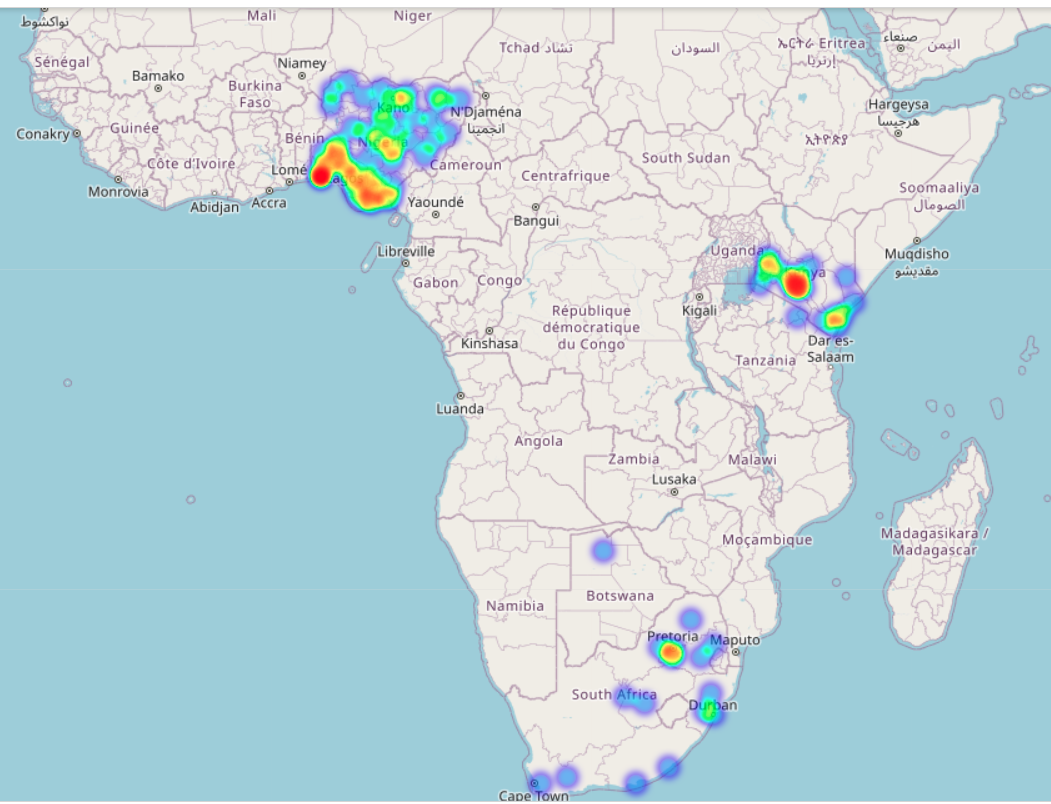

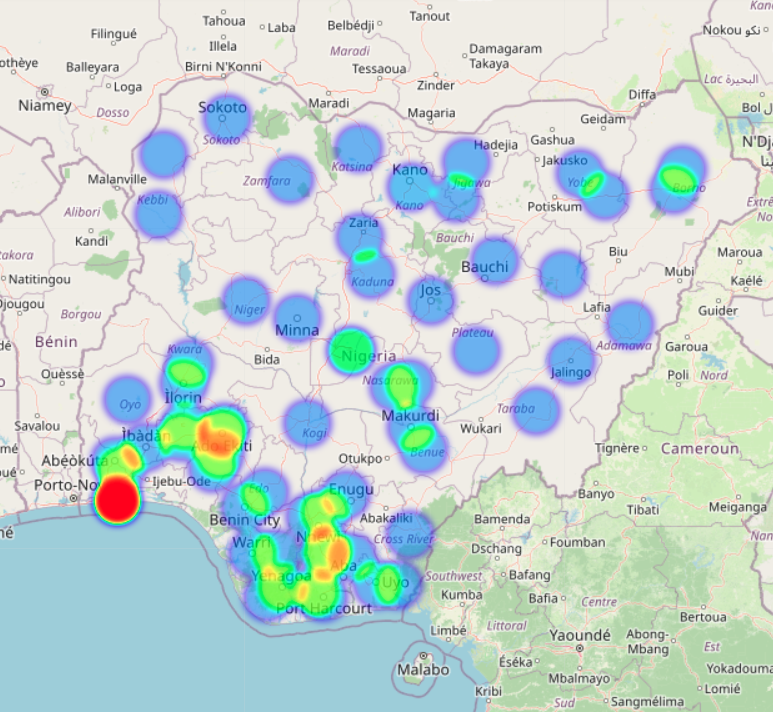

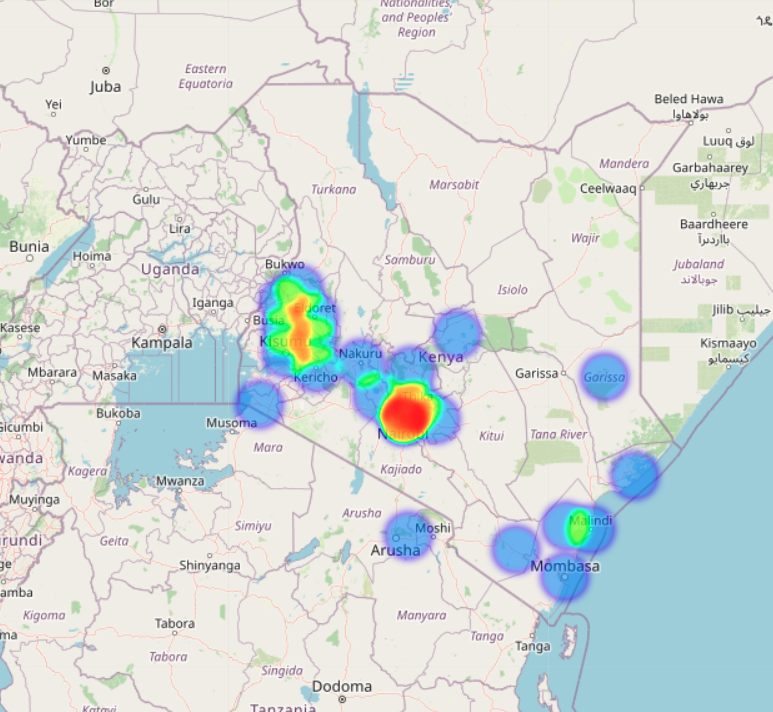

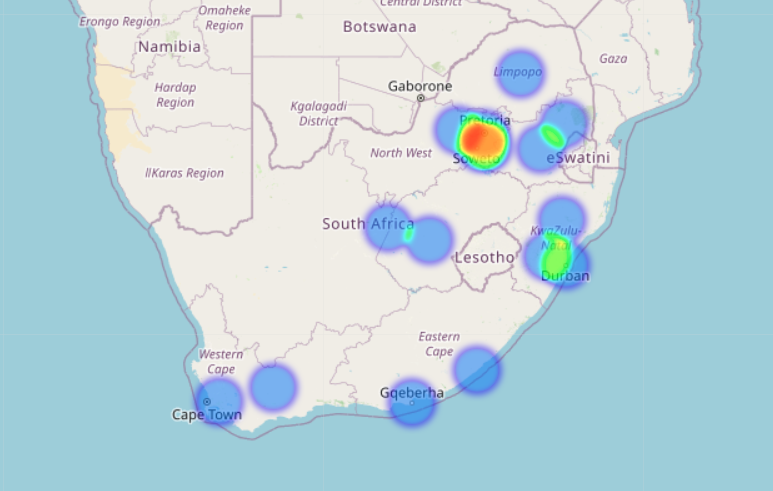

How close are they to this metro?

In [32]:
# Calculate the percentage of applicants from each focus country based on their proximity to metropolitan areas.
 (df_NKS.groupby('Nationality')['How close do you live to this city/town?']
 .value_counts(normalize=True)
 .mul(100)
 .round(1)
 .astype(str) + '%')


Nationality    How close do you live to this city/town?         
Kenyan         I live in this town/city                             40.9%
               I live within 5km of this town/city                  21.5%
               I live more than 10km away from this town or city    21.1%
               I live 5-10km away from this town/city               16.5%
Nigerian       I live in this town/city                             78.9%
               I live more than 10km away from this town or city     8.9%
               I live within 5km of this town/city                   6.5%
               I live 5-10km away from this town/city                5.7%
South African  I live in this town/city                             40.1%
               I live more than 10km away from this town or city    25.7%
               I live 5-10km away from this town/city               19.7%
               I live within 5km of this town/city                  14.5%
Name: How close do you live to this city/town?,

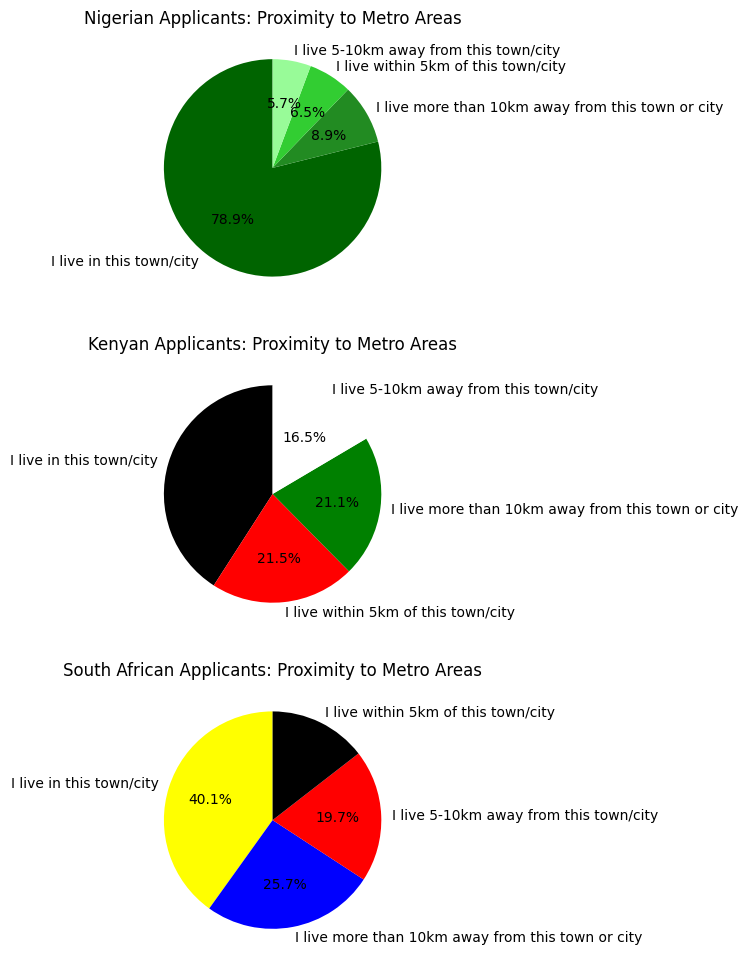

In [33]:
# Import matplotlib for plotting and generate pie charts.
import matplotlib.pyplot as plt

# Display the proximity of applicants to metro areas for each focus country. Customize colors based on flag colors.

# Define color maps for each nationality based on flag colors
color_map = {
    'Nigerian': ['#006400', '#228B22', '#32CD32', '#98FB98'],  # Dark to Light Green
    'Kenyan': ['black', 'red', 'green','white'],      # Kenyan flag: Black, Red, Green
    'South African': ['yellow', 'blue', 'red','black', 'green']  # South African flag: Black, Green, Yellow, Blue, Red
}

# Get the data
grouped_data = (df_NKS.groupby('Nationality')['How close do you live to this city/town?']
                .value_counts(normalize=True)
                .mul(100)
                .round(1)
                .reset_index(name='Percentage'))

# Initialize subplots
fig, axes = plt.subplots(3,1, figsize=(8, 12))

# Loop through each nationality
for ax, nationality in zip(axes, ['Nigerian', 'Kenyan', 'South African']):
    # Filter data for the current nationality
    data = grouped_data[grouped_data['Nationality'] == nationality]

    # Create the pie chart
    ax.pie(data['Percentage'], labels=data['How close do you live to this city/town?'], autopct='%1.1f%%', startangle=90, colors=color_map[nationality])

    # Add title
    ax.set_title(f'{nationality} Applicants: Proximity to Metro Areas')

plt.show()
